# Analysis of World Economic Freedom Data

This Data was obtained from kaggle (https://www.kaggle.com/lewisduncan93/the-economic-freedom-index). 

This is the provided info:

The Economic Freedom Index is poised to help readers track over two decades of the advancement in economic freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities. The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries. The measurement of economic freedom is based on 12 quantitative and qualitative factors, grouped into four broad categories, or pillars, of economic freedom:

- Rule of Law (property rights, government integrity, judicial effectiveness)
- Government Size (government spending, tax burden, fiscal health)
- Regulatory Efficiency (business freedom, labor freedom, monetary freedom)
- Open Markets (trade freedom, investment freedom, financial freedom)

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
#import geoplotlib as gpl
import geopandas as gpd

In [11]:
df = pd.read_csv('economic_freedom_index2019_data.csv', encoding='latin-1')
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
CountryID                      186 non-null int64
Country Name                   186 non-null object
WEBNAME                        186 non-null object
Region                         186 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freed

In [13]:
df['Region'].value_counts()

Sub-Saharan Africa              48
Europe                          45
Asia-Pacific                    43
Americas                        32
Middle East and North Africa    18
Name: Region, dtype: int64

In [14]:
df.shape

(186, 34)

In [15]:
df.drop(['CountryID','WEBNAME', 'Country'],axis=1,inplace=True)

In [16]:
df.head()

,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,...,25.6,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,...,29.5,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,...,41.4,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,...,25.3,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,...,41.0,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


## Removing null values 

First the number of null values are checked in each column. If there is any significant values in any, need to consider dropping the column rather than rows.

In [17]:
df.isnull().sum()

Country Name                   0
Region                         0
World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
Population (Millions)          0
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployment (%)               5
Inflation (%)                  4
FDI Inflow (Millions)          5
Public Deb

In [18]:
df_1 = df.dropna()

In [19]:
df_1.shape

(173, 31)

## Regionwise analysis

In [20]:
df[df['Region']=='Asia-Pacific']

,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,...,25.6,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
6,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,...,36.5,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
8,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,...,36.7,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
11,Bangladesh,Asia-Pacific,121.0,27.0,55.6,36.1,34.5,24.4,72.7,94.5,...,13.6,163.2,$687.1,7.1,6.7,"$4,211",4.4,5.7,"2,151.6",32.4
17,Bhutan,Asia-Pacific,74.0,16.0,62.9,62.5,55.4,54.5,83.0,71.6,...,30.7,0.8,$7.0,6.0,5.2,"$8,744",2.4,3.4,10.3,102.4
22,Brunei Darussalam,Asia-Pacific,63.0,14.0,65.1,64.0,56.0,43.7,90.7,59.9,...,36.6,0.4,$33.5,0.5,-1.4,"$78,196",7.1,-0.1,-46.3,2.7
25,Burma,Asia-Pacific,139.0,35.0,53.6,34.7,18.1,30.6,86.6,85.4,...,22.1,52.6,$328.7,6.7,7.2,"$6,244",0.8,5.1,"4,341.0",34.7
27,Cambodia,Asia-Pacific,105.0,22.0,57.8,37.4,27.6,16.7,89.7,85.9,...,21.7,16.0,$64.3,6.9,7.1,"$4,012",0.2,2.9,"2,784.4",35.1
34,China,Asia-Pacific,100.0,20.0,58.4,49.9,75.2,49.1,70.4,70.1,...,31.6,1390.1,"$23,159.1",6.9,7.1,"$16,660",4.7,1.6,"136,320.0",47.8
57,Fiji,Asia-Pacific,81.0,18.0,62.2,67.3,42.9,23.4,81.1,71.7,...,30.7,0.9,$8.7,3.8,3.7,"$9,777",6.3,3.4,299.0,46.6


In [21]:
df_1.groupby(['Region']).mean()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
Region,,,,,,,,,,,,,,,,,,,,,
Americas,87.833333,16.100000,60.526667,48.790000,40.433333,37.490000,78.270000,73.000000,65.680000,63.503333,...,51.000000,6.153333,28.410000,26.733333,22.066667,29.030000,1.803333,2.076667,40.723333,57.870000
Asia-Pacific,87.300000,20.600000,62.555000,56.015000,47.927500,42.627500,83.130000,72.250000,70.930000,68.500000,...,44.250000,4.957500,24.397500,22.482500,17.245000,28.795000,4.502500,4.282500,3.707500,47.772500
Europe,48.813953,22.418605,68.665116,70.330233,56.662791,56.069767,71.627907,45.997674,84.809302,74.820930,...,63.255814,2.197674,31.506977,19.553488,34.020930,41.758140,3.453488,2.451163,2.604651,60.858140
Middle East and North Africa,90.285714,7.500000,61.257143,54.442857,51.685714,46.714286,87.721429,60.764286,48.578571,67.514286,...,52.857143,5.150000,18.035714,15.607143,13.371429,35.214286,1.835714,2.742857,4.221429,61.500000
Sub-Saharan Africa,128.586957,24.391304,54.026087,38.597826,36.426087,30.878261,75.247826,76.363043,52.693478,51.943478,...,39.782609,9.204348,32.891304,29.934783,17.652174,26.710870,3.497826,3.723913,7.378261,58.228261


## Ordering by world rank

In [22]:
df_ranked = df.sort_values(by=['World Rank'])
df_ranked.head(10)

,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
72,Hong Kong,Asia-Pacific,1.0,1.0,90.2,93.3,75.3,83.8,93.1,90.3,...,17.9,7.4,$454.9,3.8,2.8,"$61,393",3.1,1.5,"104,333.0",0.1
149,Singapore,Asia-Pacific,2.0,2.0,89.4,97.4,92.4,95.1,90.4,90.7,...,17.6,5.6,$527.0,3.6,3.5,"$93,906",2.0,0.6,"62,006.0",110.9
122,New Zealand,Asia-Pacific,3.0,3.0,84.4,95.0,83.5,96.7,71.0,50.4,...,40.7,4.8,$188.6,3.0,3.3,"$38,934",4.9,1.9,"3,572.0",26.4
160,Switzerland,Europe,4.0,1.0,81.9,85.3,82.0,88.0,70.5,64.8,...,34.3,8.4,$517.2,1.1,1.6,"$61,422",4.8,0.5,"40,986.1",42.8
6,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,...,36.5,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
79,Ireland,Europe,6.0,2.0,80.5,85.8,68.4,78.0,76.3,77.4,...,27.4,4.7,$357.2,7.8,9.7,"$75,538",6.4,0.3,"28,974.6",68.5
176,United Kingdom,Europe,7.0,3.0,78.9,92.3,85.9,83.8,64.7,48.2,...,41.6,66.1,"$2,914.0",1.8,2.2,"$44,118",4.3,2.7,"15,090.0",87.0
29,Canada,Americas,8.0,1.0,77.7,87.0,69.4,84.6,76.8,51.3,...,40.3,36.7,"$1,769.3",3.0,2.1,"$48,265",6.3,1.6,"24,243.8",89.7
175,United Arab Emirates,Middle East and North Africa,9.0,1.0,77.6,81.8,87.1,78.8,99.2,68.8,...,32.3,10.1,$686.8,0.5,3.3,"$67,741",1.7,2.0,"10,354.2",19.5
162,Taiwan,Asia-Pacific,10.0,5.0,77.3,85.4,70.1,69.2,75.0,90.6,...,17.7,23.6,"$1,185.5",2.8,2.2,"$50,294",3.8,0.6,"3,255.0",35.2


It is incredible to see that within the top 5 of the world rank, there are 4 Asia-Pacific countries. The only other is from Europe and, predictably, is Switzerland.

/Users/sadia/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


Text(0.1,0.08,'Source: Kaggle 2019')

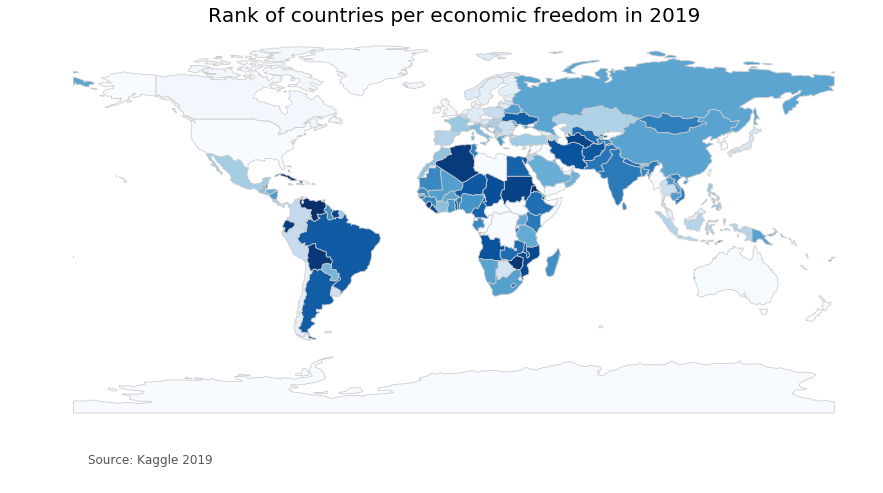

In [52]:
#graph goes here
map_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_df.head()
df_plot = map_df.set_index('name').join(df_ranked.set_index('Country Name'))

variable = 'World Rank'

vmin, vmax = 220, 120
fig, ax = plt.pyplot.subplots(1, figsize=(15, 8))
df_plot.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Rank of countries per economic freedom in 2019', fontdict={'fontsize': '20', 'fontweight' : '3'})

ax.annotate('Source: Kaggle 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')


Here the lower ranked place are coloured in a darker colour. 

In [24]:
df_ranked.tail()

,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
98,Libya,Middle East and North Africa,NaN,NaN,NaN,7.6,24.4,15.8,NaN,0.0,...,139.2,6.4,$64.4,70.8,-7.9,"$9,986",17.7,28.0,NaN,4.7
99,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"38,000 ppl.",$6.1 CHF (2014 ),NaN,NaN,"$139,100 (2009 est.)",2.1 (2016),NaN,NaN,NaN
153,Somalia,Sub-Saharan Africa,NaN,NaN,NaN,33.7,26.6,7.9,NaN,NaN,...,NaN,14.3,$18.70,1.8,2.2,NaN,6.0,NaN,384.0,NaN
161,Syria,Middle East and North Africa,NaN,NaN,NaN,37.0,24.4,20.3,NaN,NaN,...,NaN,18.4,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN
183,Yemen,Middle East and North Africa,NaN,NaN,NaN,19.6,22.2,20.3,NaN,83.7,...,NaN,30.0,$38.6,-13.8,-16.1,"$1,287",14.0,4.9,-269.9,141.0


In [25]:
#sns.jointplot(df['World Rank'],df['GDP Growth Rate (%)'])
#sns.jointplot(df['World Rank'],df['Public Debt (% of GDP)'])